In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing import image_dataset_from_directory, image

In [28]:
train_path = r'../input/fruit-and-vegetable-image-recognition/train'
valid_path = r'../input/fruit-and-vegetable-image-recognition/validation'

train_dataset = image_dataset_from_directory(train_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            label_mode = 'int', 
                                            batch_size = 16)


valid_dataset = image_dataset_from_directory(valid_path,
                                            seed = 2059,
                                            image_size = (224, 224),
                                            label_mode = 'int',
                                            batch_size = 16)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [29]:
labels = train_dataset.class_names
print(len(labels))

36


In [30]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(len(labels), activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)       

In [32]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

model.compile(optimizer = Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [33]:
checkpoint = ModelCheckpoint('./fruit_and_vegetables_classfier.h5',
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1)


callbacks = EarlyStopping(monitor = 'val_loss',
                          mode = 'min',
                          patience = 5,
                          restore_best_weights = True,
                          verbose = 1)

In [34]:
history = model.fit(x = train_dataset,
                   epochs = 40,
                   callbacks = [callbacks, checkpoint],
                   validation_data = valid_dataset)

Epoch 1/40
  3/195 [..............................] - ETA: 1:17 - loss: 4.2901 - accuracy: 0.0208  

2022-12-17 14:22:21.865228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 4.2808 - accuracy: 0.0278

2022-12-17 14:22:27.871735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 4.2451 - accuracy: 0.0276

2022-12-17 14:22:29.613677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:22:29.645451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 4.1706 - accuracy: 0.0320

2022-12-17 14:22:31.584583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 4.1326 - accuracy: 0.0380

2022-12-17 14:22:34.436986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 4.1128 - accuracy: 0.0384

2022-12-17 14:22:37.139588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 4.0136 - accuracy: 0.0484

2022-12-17 14:22:43.902983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 3.9870 - accuracy: 0.0485

2022-12-17 14:22:47.523083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 3.9570 - accuracy: 0.0495

2022-12-17 14:22:50.770568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 3.9480 - accuracy: 0.0521

2022-12-17 14:22:51.078849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 3.9415 - accuracy: 0.0564

2022-12-17 14:22:52.446713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 3.9075 - accuracy: 0.0605

2022-12-17 14:22:55.310641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 3.8945 - accuracy: 0.0605

2022-12-17 14:22:56.385923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:22:56.510930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 3.8911 - accuracy: 0.0610

2022-12-17 14:22:56.593719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 3.8690 - accuracy: 0.0652

2022-12-17 14:23:00.932061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 3.8539 - accuracy: 0.0664

2022-12-17 14:23:02.606651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 3.8263 - accuracy: 0.0700

2022-12-17 14:23:05.700682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 3.7846 - accuracy: 0.0735

2022-12-17 14:23:12.391487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:23:12.632937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:23:12.881728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 3.7617 - accuracy: 0.0758

2022-12-17 14:23:14.028244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:23:17.245303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:23:19.178471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 317ms/step - loss: 3.7567 - accuracy: 0.0767 - val_loss: 2.9310 - val_accuracy: 0.2165

Epoch 00001: val_loss improved from inf to 2.93105, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 2/40
  3/195 [..............................] - ETA: 1:18 - loss: 2.9837 - accuracy: 0.2292

2022-12-17 14:23:25.903000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 47s - loss: 3.0805 - accuracy: 0.1759

2022-12-17 14:23:32.053343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 3.0550 - accuracy: 0.1857

2022-12-17 14:23:33.861849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:23:33.889446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 42s - loss: 3.0672 - accuracy: 0.1768

2022-12-17 14:23:35.837347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 42s - loss: 3.0408 - accuracy: 0.1762

2022-12-17 14:23:39.027881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 3.0387 - accuracy: 0.1754

2022-12-17 14:23:41.044466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 3.0378 - accuracy: 0.1719

2022-12-17 14:23:47.928193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 3.0293 - accuracy: 0.1722

2022-12-17 14:23:51.452809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 3.0165 - accuracy: 0.1710

2022-12-17 14:23:54.747206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 3.0144 - accuracy: 0.1713

2022-12-17 14:23:55.069057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 2.9990 - accuracy: 0.1741

2022-12-17 14:23:56.423937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 2.9818 - accuracy: 0.1753

2022-12-17 14:23:59.185151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 2.9795 - accuracy: 0.1771

2022-12-17 14:24:00.214755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:00.341123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 2.9797 - accuracy: 0.1781

2022-12-17 14:24:00.432698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 2.9684 - accuracy: 0.1839

2022-12-17 14:24:04.580383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 2.9713 - accuracy: 0.1841

2022-12-17 14:24:06.389585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 2.9617 - accuracy: 0.1851

2022-12-17 14:24:09.598234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 2.9472 - accuracy: 0.1920

2022-12-17 14:24:16.186853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:16.414591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:16.665670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 2.9328 - accuracy: 0.1949

2022-12-17 14:24:17.853693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:21.015070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:22.975575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 63s 315ms/step - loss: 2.9304 - accuracy: 0.1958 - val_loss: 2.1098 - val_accuracy: 0.4786

Epoch 00002: val_loss improved from 2.93105 to 2.10980, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 3/40
  3/195 [..............................] - ETA: 1:23 - loss: 2.6820 - accuracy: 0.2500

2022-12-17 14:24:47.857661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 47s - loss: 2.5716 - accuracy: 0.2708

2022-12-17 14:24:53.934528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 2.5025 - accuracy: 0.2978

2022-12-17 14:24:55.661988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:24:55.686467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 2.5441 - accuracy: 0.2881

2022-12-17 14:24:57.662959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 41s - loss: 2.5598 - accuracy: 0.2800

2022-12-17 14:25:00.736544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 2.5411 - accuracy: 0.2785

2022-12-17 14:25:02.633533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 2.5477 - accuracy: 0.2850

2022-12-17 14:25:09.452255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 2.5326 - accuracy: 0.2832

2022-12-17 14:25:13.753204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 2.5269 - accuracy: 0.2883

2022-12-17 14:25:16.940545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 25s - loss: 2.5258 - accuracy: 0.2888

2022-12-17 14:25:17.292899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 24s - loss: 2.5217 - accuracy: 0.2896

2022-12-17 14:25:18.663082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 2.5187 - accuracy: 0.2917

2022-12-17 14:25:21.598954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 2.5145 - accuracy: 0.2928

2022-12-17 14:25:22.860365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:25:22.976997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:25:23.060336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 2.5014 - accuracy: 0.2987

2022-12-17 14:25:27.193810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 2.5007 - accuracy: 0.3005

2022-12-17 14:25:28.847802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 2.4934 - accuracy: 0.3007

2022-12-17 14:25:32.139230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 2.4827 - accuracy: 0.3035

2022-12-17 14:25:38.323433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 2.4817 - accuracy: 0.3029

2022-12-17 14:25:38.565579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:25:38.809133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 2.4750 - accuracy: 0.3041

2022-12-17 14:25:39.972920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:25:43.472326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:25:46.093844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 65s 321ms/step - loss: 2.4748 - accuracy: 0.3037 - val_loss: 1.6397 - val_accuracy: 0.6353

Epoch 00003: val_loss improved from 2.10980 to 1.63972, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 4/40
  3/195 [..............................] - ETA: 1:21 - loss: 2.1470 - accuracy: 0.4375

2022-12-17 14:26:09.781626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 49s - loss: 2.2244 - accuracy: 0.3565

2022-12-17 14:26:16.208973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 46s - loss: 2.1547 - accuracy: 0.3824

2022-12-17 14:26:18.157301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:26:18.180831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 2.1875 - accuracy: 0.3720

2022-12-17 14:26:20.131743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 2.2110 - accuracy: 0.3603

2022-12-17 14:26:22.941201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 2.1780 - accuracy: 0.3717

2022-12-17 14:26:24.769619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 2.1931 - accuracy: 0.3772

2022-12-17 14:26:31.538791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 2.1871 - accuracy: 0.3783

2022-12-17 14:26:35.036970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 2.1803 - accuracy: 0.3756

2022-12-17 14:26:38.252575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/195 [===============>..............] - ETA: 24s - loss: 2.1782 - accuracy: 0.3744

2022-12-17 14:26:38.562809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 2.1751 - accuracy: 0.3767

2022-12-17 14:26:40.083086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 2.1572 - accuracy: 0.3831

2022-12-17 14:26:42.901818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 2.1541 - accuracy: 0.3858

2022-12-17 14:26:43.959891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:26:44.059484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:26:44.141058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 2.1501 - accuracy: 0.3835

2022-12-17 14:26:48.837373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 2.1515 - accuracy: 0.3857

2022-12-17 14:26:50.765259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 2.1356 - accuracy: 0.3895

2022-12-17 14:26:54.070596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 2.1376 - accuracy: 0.3902

2022-12-17 14:27:00.176839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 2.1359 - accuracy: 0.3908

2022-12-17 14:27:00.421330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:27:00.680484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 2.1294 - accuracy: 0.3915

2022-12-17 14:27:02.054653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:27:05.198379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:27:07.194898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 317ms/step - loss: 2.1298 - accuracy: 0.3910 - val_loss: 1.3127 - val_accuracy: 0.7379

Epoch 00004: val_loss improved from 1.63972 to 1.31265, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 5/40
  3/195 [..............................] - ETA: 1:19 - loss: 1.8688 - accuracy: 0.5000

2022-12-17 14:27:13.927280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 49s - loss: 1.9269 - accuracy: 0.4537

2022-12-17 14:27:20.355578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 45s - loss: 1.9360 - accuracy: 0.4338

2022-12-17 14:27:22.118779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:27:22.143920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 1.9430 - accuracy: 0.4314

2022-12-17 14:27:24.296569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 42s - loss: 1.9294 - accuracy: 0.4425

2022-12-17 14:27:27.171883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 1.9103 - accuracy: 0.4485

2022-12-17 14:27:29.034429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 1.9022 - accuracy: 0.4576

2022-12-17 14:27:36.071723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 1.8842 - accuracy: 0.4714

2022-12-17 14:27:39.684498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 1.8679 - accuracy: 0.4770

2022-12-17 14:27:42.786918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 1.8705 - accuracy: 0.4774

2022-12-17 14:27:43.105446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 1.8575 - accuracy: 0.4816

2022-12-17 14:27:44.513298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 1.8500 - accuracy: 0.4822

2022-12-17 14:27:47.564121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 1.8495 - accuracy: 0.4816

2022-12-17 14:27:48.655464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:27:48.787905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 1.8480 - accuracy: 0.4818

2022-12-17 14:27:48.876332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 1.8529 - accuracy: 0.4808

2022-12-17 14:27:53.426007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 1.8606 - accuracy: 0.4769

2022-12-17 14:27:55.149982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 1.8577 - accuracy: 0.4776

2022-12-17 14:27:58.617372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 1.8510 - accuracy: 0.4797

2022-12-17 14:28:04.615638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:28:04.848369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:28:05.096936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 1.8505 - accuracy: 0.4764

2022-12-17 14:28:06.302393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:28:09.642601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:28:11.564495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 318ms/step - loss: 1.8478 - accuracy: 0.4770 - val_loss: 1.0311 - val_accuracy: 0.7892

Epoch 00005: val_loss improved from 1.31265 to 1.03110, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 6/40
  3/195 [..............................] - ETA: 1:19 - loss: 1.7289 - accuracy: 0.4375

2022-12-17 14:28:35.542424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 47s - loss: 1.6572 - accuracy: 0.5301

2022-12-17 14:28:41.655443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 1.6537 - accuracy: 0.5331

2022-12-17 14:28:43.383693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:28:43.409396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 1.6415 - accuracy: 0.5396

2022-12-17 14:28:45.358341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 1.6393 - accuracy: 0.5282

2022-12-17 14:28:48.186916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 1.6408 - accuracy: 0.5252

2022-12-17 14:28:50.083423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 1.6686 - accuracy: 0.5231

2022-12-17 14:28:57.429512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 1.6688 - accuracy: 0.5226

2022-12-17 14:29:00.955674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 1.6474 - accuracy: 0.5271

2022-12-17 14:29:04.251403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 1.6382 - accuracy: 0.5312

2022-12-17 14:29:04.589007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 1.6438 - accuracy: 0.5279

2022-12-17 14:29:05.946990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 1.6294 - accuracy: 0.5340

2022-12-17 14:29:08.794201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 1.6337 - accuracy: 0.5327

2022-12-17 14:29:09.892901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:29:10.020951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 1.6384 - accuracy: 0.5315

2022-12-17 14:29:10.107379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 1.6361 - accuracy: 0.5304

2022-12-17 14:29:14.476697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 1.6369 - accuracy: 0.5300

2022-12-17 14:29:16.131528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 1.6311 - accuracy: 0.5338

2022-12-17 14:29:19.329136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 1.6283 - accuracy: 0.5343

2022-12-17 14:29:26.026053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:29:26.269507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:29:26.518129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 1.6216 - accuracy: 0.5359

2022-12-17 14:29:27.689629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:29:30.834808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:29:32.805870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 317ms/step - loss: 1.6193 - accuracy: 0.5368 - val_loss: 0.8518 - val_accuracy: 0.8519

Epoch 00006: val_loss improved from 1.03110 to 0.85179, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 7/40
  3/195 [..............................] - ETA: 1:31 - loss: 1.2961 - accuracy: 0.6250

2022-12-17 14:29:58.278562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 1.3635 - accuracy: 0.6435

2022-12-17 14:30:04.235224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 1.4418 - accuracy: 0.6232

2022-12-17 14:30:06.007101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:06.039786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 42s - loss: 1.4284 - accuracy: 0.6326

2022-12-17 14:30:08.293362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 1.4466 - accuracy: 0.6201

2022-12-17 14:30:11.195093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 1.4345 - accuracy: 0.6217

2022-12-17 14:30:13.055968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 1.4382 - accuracy: 0.6124

2022-12-17 14:30:20.220468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 1.4325 - accuracy: 0.6110

2022-12-17 14:30:24.004583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 26s - loss: 1.4315 - accuracy: 0.6114

2022-12-17 14:30:27.743576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 25s - loss: 1.4338 - accuracy: 0.6123

2022-12-17 14:30:28.086006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 24s - loss: 1.4314 - accuracy: 0.6116

2022-12-17 14:30:29.516715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 21s - loss: 1.4207 - accuracy: 0.6138

2022-12-17 14:30:32.622530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 20s - loss: 1.4245 - accuracy: 0.6141

2022-12-17 14:30:33.724199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:33.841110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 1.4255 - accuracy: 0.6137

2022-12-17 14:30:33.931890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 1.4266 - accuracy: 0.6098

2022-12-17 14:30:38.099127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 1.4373 - accuracy: 0.6066

2022-12-17 14:30:39.809798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 1.4328 - accuracy: 0.6061

2022-12-17 14:30:43.229334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 1.4313 - accuracy: 0.6020

2022-12-17 14:30:49.262755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:49.503661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:49.759920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 1.4251 - accuracy: 0.6020

2022-12-17 14:30:50.941545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:54.328110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:30:56.237825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 66s 323ms/step - loss: 1.4267 - accuracy: 0.6013 - val_loss: 0.7080 - val_accuracy: 0.9003

Epoch 00007: val_loss improved from 0.85179 to 0.70799, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 8/40
  3/195 [..............................] - ETA: 1:31 - loss: 1.2261 - accuracy: 0.7083

2022-12-17 14:31:03.452723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 1.2428 - accuracy: 0.6690

2022-12-17 14:31:09.241386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 1.2199 - accuracy: 0.6801

2022-12-17 14:31:10.997673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:11.031787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 1.2428 - accuracy: 0.6768

2022-12-17 14:31:12.983079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 1.2077 - accuracy: 0.6814

2022-12-17 14:31:15.957645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 1.2016 - accuracy: 0.6886

2022-12-17 14:31:17.808714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 1.2470 - accuracy: 0.6689

2022-12-17 14:31:24.521811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 1.2526 - accuracy: 0.6636

2022-12-17 14:31:28.323777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 1.2564 - accuracy: 0.6627

2022-12-17 14:31:31.886660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 1.2540 - accuracy: 0.6632

2022-12-17 14:31:32.203206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 1.2419 - accuracy: 0.6669

2022-12-17 14:31:33.579664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 1.2390 - accuracy: 0.6657

2022-12-17 14:31:36.672428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 1.2456 - accuracy: 0.6644

2022-12-17 14:31:37.768469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:37.872731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:37.954246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 1.2500 - accuracy: 0.6580

2022-12-17 14:31:42.113301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 1.2475 - accuracy: 0.6575

2022-12-17 14:31:43.764015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 1.2513 - accuracy: 0.6564

2022-12-17 14:31:47.200370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 1.2468 - accuracy: 0.6576

2022-12-17 14:31:53.240750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:53.475915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:53.725101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 1.2471 - accuracy: 0.6580

2022-12-17 14:31:54.859988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:31:58.185353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:32:00.335538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 316ms/step - loss: 1.2484 - accuracy: 0.6575 - val_loss: 0.6102 - val_accuracy: 0.9145

Epoch 00008: val_loss improved from 0.70799 to 0.61017, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 9/40
  3/195 [..............................] - ETA: 1:18 - loss: 0.9681 - accuracy: 0.7292

2022-12-17 14:32:07.039257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 48s - loss: 1.0645 - accuracy: 0.7338

2022-12-17 14:32:13.362689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 45s - loss: 1.0972 - accuracy: 0.7224

2022-12-17 14:32:15.076513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:32:15.101239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 42s - loss: 1.0948 - accuracy: 0.7119

2022-12-17 14:32:17.086910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 1.1216 - accuracy: 0.6936

2022-12-17 14:32:20.192684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 1.0986 - accuracy: 0.7039

2022-12-17 14:32:22.057354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 1.1009 - accuracy: 0.7061

2022-12-17 14:32:28.744005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 1.0939 - accuracy: 0.7074

2022-12-17 14:32:32.934826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 1.0815 - accuracy: 0.7117

2022-12-17 14:32:36.096666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 25s - loss: 1.0797 - accuracy: 0.7135

2022-12-17 14:32:36.437483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 1.0809 - accuracy: 0.7137

2022-12-17 14:32:37.838733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 1.0737 - accuracy: 0.7149

2022-12-17 14:32:40.779309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 1.0719 - accuracy: 0.7163

2022-12-17 14:32:41.997301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:32:42.195748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 1.0705 - accuracy: 0.7165

2022-12-17 14:32:42.302158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 1.0716 - accuracy: 0.7156

2022-12-17 14:32:46.469516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 1.0602 - accuracy: 0.7196

2022-12-17 14:32:48.180817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 1.0677 - accuracy: 0.7138

2022-12-17 14:32:51.496853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 1.0659 - accuracy: 0.7150

2022-12-17 14:32:57.664132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:32:57.904804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:32:58.152953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 1.0658 - accuracy: 0.7153

2022-12-17 14:32:59.293815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:33:02.481293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:33:05.005260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 319ms/step - loss: 1.0657 - accuracy: 0.7159 - val_loss: 0.4840 - val_accuracy: 0.9202

Epoch 00009: val_loss improved from 0.61017 to 0.48399, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 10/40
  3/195 [..............................] - ETA: 1:17 - loss: 0.9402 - accuracy: 0.7708

2022-12-17 14:33:11.401256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 45s - loss: 0.9465 - accuracy: 0.7338

2022-12-17 14:33:17.333144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 42s - loss: 0.9631 - accuracy: 0.7390

2022-12-17 14:33:19.026146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:33:19.050305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 40s - loss: 0.9283 - accuracy: 0.7454

2022-12-17 14:33:20.958807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 39s - loss: 0.9320 - accuracy: 0.7414

2022-12-17 14:33:23.724316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.9090 - accuracy: 0.7478

2022-12-17 14:33:25.698821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.9101 - accuracy: 0.7545

2022-12-17 14:33:32.720483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.9166 - accuracy: 0.7540

2022-12-17 14:33:36.967350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.9121 - accuracy: 0.7547

2022-12-17 14:33:40.128468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.9107 - accuracy: 0.7552

2022-12-17 14:33:40.434591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.9138 - accuracy: 0.7539

2022-12-17 14:33:41.758315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.9197 - accuracy: 0.7536

2022-12-17 14:33:44.587415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.9185 - accuracy: 0.7544

2022-12-17 14:33:45.617156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:33:45.717613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:33:45.807310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.9171 - accuracy: 0.7545

2022-12-17 14:33:50.113219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.9209 - accuracy: 0.7513

2022-12-17 14:33:51.761456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.9134 - accuracy: 0.7543

2022-12-17 14:33:54.856361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.9165 - accuracy: 0.7538

2022-12-17 14:34:00.944105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:34:01.171477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:34:01.420649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.9152 - accuracy: 0.7523

2022-12-17 14:34:02.572644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:34:05.885462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:34:08.187846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 63s 314ms/step - loss: 0.9159 - accuracy: 0.7518 - val_loss: 0.4281 - val_accuracy: 0.9345

Epoch 00010: val_loss improved from 0.48399 to 0.42813, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 11/40
  3/195 [..............................] - ETA: 1:16 - loss: 0.6192 - accuracy: 0.8542

2022-12-17 14:34:33.523591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 47s - loss: 0.8448 - accuracy: 0.7824

2022-12-17 14:34:39.771647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 0.8199 - accuracy: 0.7960

2022-12-17 14:34:41.498260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:34:41.539164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 0.8017 - accuracy: 0.7942

2022-12-17 14:34:43.753300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 0.8158 - accuracy: 0.7941

2022-12-17 14:34:46.614552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 0.8133 - accuracy: 0.7993

2022-12-17 14:34:48.510456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.7927 - accuracy: 0.8073

2022-12-17 14:34:55.493506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.7903 - accuracy: 0.8065

2022-12-17 14:34:59.101555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.7942 - accuracy: 0.8048

2022-12-17 14:35:02.264958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.7928 - accuracy: 0.8050

2022-12-17 14:35:02.603263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.7937 - accuracy: 0.8069

2022-12-17 14:35:04.017515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.7997 - accuracy: 0.8034

2022-12-17 14:35:07.129907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.8008 - accuracy: 0.8016

2022-12-17 14:35:08.210512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:35:08.402465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.8016 - accuracy: 0.8017

2022-12-17 14:35:08.561916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 0.8102 - accuracy: 0.7969

2022-12-17 14:35:12.993068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.8031 - accuracy: 0.7984

2022-12-17 14:35:14.665100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.7986 - accuracy: 0.7972

2022-12-17 14:35:18.123113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.7919 - accuracy: 0.8001

2022-12-17 14:35:24.215287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.7924 - accuracy: 0.7998

2022-12-17 14:35:24.459504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:35:24.710313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.7891 - accuracy: 0.7995

2022-12-17 14:35:25.923622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:35:29.424879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:35:31.396831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 319ms/step - loss: 0.7883 - accuracy: 0.7997 - val_loss: 0.3713 - val_accuracy: 0.9402

Epoch 00011: val_loss improved from 0.42813 to 0.37127, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 12/40
  3/195 [..............................] - ETA: 1:15 - loss: 0.6709 - accuracy: 0.8333

2022-12-17 14:35:55.235116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 45s - loss: 0.7362 - accuracy: 0.8333

2022-12-17 14:36:01.152693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 42s - loss: 0.7179 - accuracy: 0.8327

2022-12-17 14:36:02.857334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:02.891064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 40s - loss: 0.6940 - accuracy: 0.8384

2022-12-17 14:36:04.759010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 39s - loss: 0.6923 - accuracy: 0.8407

2022-12-17 14:36:07.565962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 37s - loss: 0.6946 - accuracy: 0.8355

2022-12-17 14:36:09.384086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.6946 - accuracy: 0.8341

2022-12-17 14:36:16.936615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.6846 - accuracy: 0.8391

2022-12-17 14:36:20.486381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.6884 - accuracy: 0.8373

2022-12-17 14:36:23.820534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.6868 - accuracy: 0.8368

2022-12-17 14:36:24.117982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.6807 - accuracy: 0.8387

2022-12-17 14:36:25.468096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.6805 - accuracy: 0.8399

2022-12-17 14:36:28.334701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.6801 - accuracy: 0.8401

2022-12-17 14:36:29.421027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:29.526059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:29.614885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.6716 - accuracy: 0.8438

2022-12-17 14:36:33.902702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.6698 - accuracy: 0.8429

2022-12-17 14:36:35.553232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.6667 - accuracy: 0.8436

2022-12-17 14:36:38.784703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.6691 - accuracy: 0.8417

2022-12-17 14:36:45.398888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:45.624710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:45.875076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.6650 - accuracy: 0.8426

2022-12-17 14:36:47.040486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:50.240440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:36:52.219893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 315ms/step - loss: 0.6645 - accuracy: 0.8427 - val_loss: 0.3345 - val_accuracy: 0.9345

Epoch 00012: val_loss improved from 0.37127 to 0.33447, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 13/40
  3/195 [..............................] - ETA: 1:21 - loss: 0.5943 - accuracy: 0.8542

2022-12-17 14:36:59.000649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 45s - loss: 0.5938 - accuracy: 0.8704

2022-12-17 14:37:04.749655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.5899 - accuracy: 0.8695

2022-12-17 14:37:06.671781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:37:06.699043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.5836 - accuracy: 0.8689

2022-12-17 14:37:08.650249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 0.5835 - accuracy: 0.8664

2022-12-17 14:37:11.479982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.5809 - accuracy: 0.8684

2022-12-17 14:37:13.271993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.5788 - accuracy: 0.8676

2022-12-17 14:37:20.904498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.5763 - accuracy: 0.8677

2022-12-17 14:37:24.406143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.5767 - accuracy: 0.8691

2022-12-17 14:37:27.588933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/195 [===============>..............] - ETA: 25s - loss: 0.5793 - accuracy: 0.8674

2022-12-17 14:37:28.046363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.5778 - accuracy: 0.8689

2022-12-17 14:37:29.452981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.5773 - accuracy: 0.8694

2022-12-17 14:37:32.313450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.5755 - accuracy: 0.8686

2022-12-17 14:37:33.389481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:37:33.517714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.5759 - accuracy: 0.8676

2022-12-17 14:37:33.614489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.5736 - accuracy: 0.8679

2022-12-17 14:37:37.829972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.5777 - accuracy: 0.8660

2022-12-17 14:37:39.694406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.5790 - accuracy: 0.8660

2022-12-17 14:37:42.930153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.5747 - accuracy: 0.8671

2022-12-17 14:37:49.523918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.5741 - accuracy: 0.8674

2022-12-17 14:37:49.864303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:37:50.194980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.8688

2022-12-17 14:37:51.368797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:37:54.463212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:37:56.357611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 316ms/step - loss: 0.5681 - accuracy: 0.8690 - val_loss: 0.2869 - val_accuracy: 0.9516

Epoch 00013: val_loss improved from 0.33447 to 0.28692, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 14/40
  3/195 [..............................] - ETA: 1:17 - loss: 0.4179 - accuracy: 0.8750

2022-12-17 14:38:20.762970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.5060 - accuracy: 0.8819

2022-12-17 14:38:26.774452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.5015 - accuracy: 0.8805

2022-12-17 14:38:28.487808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:38:28.523314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.4857 - accuracy: 0.8872

2022-12-17 14:38:30.450288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 0.5023 - accuracy: 0.8860

2022-12-17 14:38:33.279573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.4970 - accuracy: 0.8860

2022-12-17 14:38:35.324395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.5010 - accuracy: 0.8847

2022-12-17 14:38:42.013236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.4915 - accuracy: 0.8876

2022-12-17 14:38:45.814597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.4977 - accuracy: 0.8874

2022-12-17 14:38:49.488921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.4998 - accuracy: 0.8860

2022-12-17 14:38:49.793308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.4982 - accuracy: 0.8856

2022-12-17 14:38:51.142699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.4946 - accuracy: 0.8882

2022-12-17 14:38:53.987757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.4949 - accuracy: 0.8878

2022-12-17 14:38:55.130295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:38:55.224056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:38:55.313678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.4955 - accuracy: 0.8884

2022-12-17 14:38:59.507842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.4949 - accuracy: 0.8891

2022-12-17 14:39:01.152219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.4913 - accuracy: 0.8915

2022-12-17 14:39:04.291080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.4811 - accuracy: 0.8963

2022-12-17 14:39:10.528978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:39:10.757470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:39:11.003760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8954

2022-12-17 14:39:12.167018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:39:15.312167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:39:17.359196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 316ms/step - loss: 0.4823 - accuracy: 0.8960 - val_loss: 0.2630 - val_accuracy: 0.9487

Epoch 00014: val_loss improved from 0.28692 to 0.26301, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 15/40
  3/195 [..............................] - ETA: 1:18 - loss: 0.4245 - accuracy: 0.9167

2022-12-17 14:39:42.882414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 45s - loss: 0.4238 - accuracy: 0.8981

2022-12-17 14:39:48.787154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 45s - loss: 0.4153 - accuracy: 0.9026

2022-12-17 14:39:51.093060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:39:51.155290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 44s - loss: 0.4165 - accuracy: 0.8979

2022-12-17 14:39:53.344807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 42s - loss: 0.4112 - accuracy: 0.9093

2022-12-17 14:39:56.240107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 0.4135 - accuracy: 0.9090

2022-12-17 14:39:58.093850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 0.4159 - accuracy: 0.9055

2022-12-17 14:40:05.090524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.4134 - accuracy: 0.9096

2022-12-17 14:40:08.701363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.4128 - accuracy: 0.9092

2022-12-17 14:40:11.940529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 25s - loss: 0.4124 - accuracy: 0.9103

2022-12-17 14:40:12.302295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 24s - loss: 0.4138 - accuracy: 0.9090

2022-12-17 14:40:13.863055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.4131 - accuracy: 0.9090

2022-12-17 14:40:16.778866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.4117 - accuracy: 0.9087

2022-12-17 14:40:17.893150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:40:18.013815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.4117 - accuracy: 0.9085

2022-12-17 14:40:18.105088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 0.4155 - accuracy: 0.9076

2022-12-17 14:40:22.810462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.4187 - accuracy: 0.9067

2022-12-17 14:40:24.680351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.4172 - accuracy: 0.9057

2022-12-17 14:40:27.973790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.4139 - accuracy: 0.9071

2022-12-17 14:40:34.115917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.4150 - accuracy: 0.9066

2022-12-17 14:40:34.353101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:40:34.607066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.9074

2022-12-17 14:40:35.952718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:40:39.148927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:40:41.061477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 65s 321ms/step - loss: 0.4162 - accuracy: 0.9072 - val_loss: 0.2456 - val_accuracy: 0.9487

Epoch 00015: val_loss improved from 0.26301 to 0.24555, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 16/40
  3/195 [..............................] - ETA: 1:16 - loss: 0.3250 - accuracy: 0.9583

2022-12-17 14:41:04.578432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.4510 - accuracy: 0.9097

2022-12-17 14:41:10.614330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.4381 - accuracy: 0.9136

2022-12-17 14:41:12.312766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:12.347088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.4237 - accuracy: 0.9162

2022-12-17 14:41:14.273011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 40s - loss: 0.4104 - accuracy: 0.9175

2022-12-17 14:41:16.992855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.4112 - accuracy: 0.9189

2022-12-17 14:41:18.963897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.3881 - accuracy: 0.9241

2022-12-17 14:41:26.325125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.3867 - accuracy: 0.9249

2022-12-17 14:41:30.604349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.3871 - accuracy: 0.9228

2022-12-17 14:41:33.653357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.3848 - accuracy: 0.9230

2022-12-17 14:41:33.964472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.3857 - accuracy: 0.9213

2022-12-17 14:41:35.299993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.3792 - accuracy: 0.9233

2022-12-17 14:41:38.127068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.3769 - accuracy: 0.9232

2022-12-17 14:41:39.205103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:39.310279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:39.395802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.3761 - accuracy: 0.9228

2022-12-17 14:41:43.625686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.3820 - accuracy: 0.9208

2022-12-17 14:41:45.238726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.3853 - accuracy: 0.9178

2022-12-17 14:41:48.386142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.3803 - accuracy: 0.9196

2022-12-17 14:41:54.499143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:54.724552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:54.971086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.3761 - accuracy: 0.9220

2022-12-17 14:41:56.109908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:41:59.223429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:42:01.684709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 317ms/step - loss: 0.3774 - accuracy: 0.9213 - val_loss: 0.2308 - val_accuracy: 0.9573

Epoch 00016: val_loss improved from 0.24555 to 0.23083, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 17/40
  3/195 [..............................] - ETA: 1:18 - loss: 0.3211 - accuracy: 0.9583

2022-12-17 14:42:26.778395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 48s - loss: 0.3138 - accuracy: 0.9352

2022-12-17 14:42:33.108016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 45s - loss: 0.3132 - accuracy: 0.9375

2022-12-17 14:42:34.845271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:42:34.878744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 0.3115 - accuracy: 0.9390

2022-12-17 14:42:37.070659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 0.3036 - accuracy: 0.9424

2022-12-17 14:42:39.834688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 0.3022 - accuracy: 0.9419

2022-12-17 14:42:41.673208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.3010 - accuracy: 0.9420

2022-12-17 14:42:48.596123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.3138 - accuracy: 0.9382

2022-12-17 14:42:52.092967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.3160 - accuracy: 0.9399

2022-12-17 14:42:55.130266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.3182 - accuracy: 0.9381

2022-12-17 14:42:55.434764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.3148 - accuracy: 0.9386

2022-12-17 14:42:56.764400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.3132 - accuracy: 0.9380

2022-12-17 14:42:59.608254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.3113 - accuracy: 0.9395

2022-12-17 14:43:00.641397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:00.738392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:00.824674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.3116 - accuracy: 0.9388

2022-12-17 14:43:05.328365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.3116 - accuracy: 0.9388

2022-12-17 14:43:06.992862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.3144 - accuracy: 0.9367

2022-12-17 14:43:10.343718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.3214 - accuracy: 0.9320

2022-12-17 14:43:16.171024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:16.397244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:16.643481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.3207 - accuracy: 0.9323

2022-12-17 14:43:17.790933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:21.091662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:23.055563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 63s 311ms/step - loss: 0.3202 - accuracy: 0.9326 - val_loss: 0.2017 - val_accuracy: 0.9573

Epoch 00017: val_loss improved from 0.23083 to 0.20166, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 18/40
  3/195 [..............................] - ETA: 1:19 - loss: 0.1872 - accuracy: 0.9583

2022-12-17 14:43:48.403994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.2773 - accuracy: 0.9329

2022-12-17 14:43:54.448997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.2702 - accuracy: 0.9357

2022-12-17 14:43:56.162139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:43:56.187367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.2752 - accuracy: 0.9375

2022-12-17 14:43:58.129668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 40s - loss: 0.2727 - accuracy: 0.9400

2022-12-17 14:44:00.845059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.2808 - accuracy: 0.9364

2022-12-17 14:44:02.724246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.2793 - accuracy: 0.9397

2022-12-17 14:44:10.098293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.2800 - accuracy: 0.9415

2022-12-17 14:44:13.615241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.2822 - accuracy: 0.9434

2022-12-17 14:44:16.902676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.2816 - accuracy: 0.9433

2022-12-17 14:44:17.227744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.2818 - accuracy: 0.9436

2022-12-17 14:44:18.553147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.2820 - accuracy: 0.9436

2022-12-17 14:44:21.329294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.2802 - accuracy: 0.9444

2022-12-17 14:44:22.376695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:22.482249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:22.572357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.2745 - accuracy: 0.9460

2022-12-17 14:44:26.821994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 13s - loss: 0.2707 - accuracy: 0.9473

2022-12-17 14:44:28.475604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.2697 - accuracy: 0.9477

2022-12-17 14:44:31.602503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.2724 - accuracy: 0.9471

2022-12-17 14:44:38.352905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:38.579199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:38.828149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.2712 - accuracy: 0.9475

2022-12-17 14:44:39.956973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:43.091129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:45.028006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 63s 314ms/step - loss: 0.2713 - accuracy: 0.9474 - val_loss: 0.2240 - val_accuracy: 0.9544

Epoch 00018: val_loss did not improve from 0.20166
Epoch 19/40
  3/195 [..............................] - ETA: 1:22 - loss: 0.2903 - accuracy: 0.8958

2022-12-17 14:44:51.937595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.2693 - accuracy: 0.9352

2022-12-17 14:44:57.863444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 44s - loss: 0.2614 - accuracy: 0.9393

2022-12-17 14:44:59.770908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:44:59.796435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.2736 - accuracy: 0.9405

2022-12-17 14:45:01.766792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 0.2633 - accuracy: 0.9461

2022-12-17 14:45:04.639443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.2621 - accuracy: 0.9452

2022-12-17 14:45:06.508309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 0.2626 - accuracy: 0.9435

2022-12-17 14:45:14.038320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.2593 - accuracy: 0.9461

2022-12-17 14:45:17.650518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.2615 - accuracy: 0.9452

2022-12-17 14:45:21.075010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 25s - loss: 0.2597 - accuracy: 0.9450

2022-12-17 14:45:21.447791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 24s - loss: 0.2587 - accuracy: 0.9464

2022-12-17 14:45:22.815055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.2574 - accuracy: 0.9477

2022-12-17 14:45:25.725902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.2610 - accuracy: 0.9464

2022-12-17 14:45:26.811833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:45:26.926644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.2605 - accuracy: 0.9469

2022-12-17 14:45:27.019473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.2605 - accuracy: 0.9473

2022-12-17 14:45:31.224069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.2628 - accuracy: 0.9456

2022-12-17 14:45:33.094085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.2635 - accuracy: 0.9450

2022-12-17 14:45:36.362513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.2590 - accuracy: 0.9472

2022-12-17 14:45:43.235340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.2584 - accuracy: 0.9475

2022-12-17 14:45:43.478106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:45:43.724428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.2565 - accuracy: 0.9479

2022-12-17 14:45:44.868511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:45:48.112286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:45:50.081671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 65s 321ms/step - loss: 0.2566 - accuracy: 0.9477 - val_loss: 0.1981 - val_accuracy: 0.9544

Epoch 00019: val_loss improved from 0.20166 to 0.19807, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 20/40
  3/195 [..............................] - ETA: 1:21 - loss: 0.2170 - accuracy: 0.9792

2022-12-17 14:45:56.907871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 44s - loss: 0.2062 - accuracy: 0.9583

2022-12-17 14:46:02.635320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 42s - loss: 0.2134 - accuracy: 0.9577

2022-12-17 14:46:04.392607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:04.417015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.2122 - accuracy: 0.9619

2022-12-17 14:46:06.557697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 0.2193 - accuracy: 0.9608

2022-12-17 14:46:09.403819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 0.2172 - accuracy: 0.9616

2022-12-17 14:46:11.812943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.2154 - accuracy: 0.9613

2022-12-17 14:46:18.814163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.2142 - accuracy: 0.9601

2022-12-17 14:46:22.348924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.2140 - accuracy: 0.9605

2022-12-17 14:46:25.365298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.2151 - accuracy: 0.9601

2022-12-17 14:46:25.699664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.2154 - accuracy: 0.9604

2022-12-17 14:46:27.276333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.2186 - accuracy: 0.9583

2022-12-17 14:46:30.261129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.2171 - accuracy: 0.9592

2022-12-17 14:46:31.340028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:31.437753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:31.527343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.2209 - accuracy: 0.9580

2022-12-17 14:46:35.701565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.2210 - accuracy: 0.9580

2022-12-17 14:46:37.425953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.2215 - accuracy: 0.9587

2022-12-17 14:46:40.732415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.2224 - accuracy: 0.9591 ETA: 8s

2022-12-17 14:46:47.151236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:47.383067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:47.682697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9595

2022-12-17 14:46:48.908589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9589

2022-12-17 14:46:52.106332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:46:54.070372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 316ms/step - loss: 0.2222 - accuracy: 0.9589 - val_loss: 0.2083 - val_accuracy: 0.9601

Epoch 00020: val_loss did not improve from 0.19807
Epoch 21/40
  3/195 [..............................] - ETA: 1:33 - loss: 0.2084 - accuracy: 0.9375

2022-12-17 14:47:00.713905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.1968 - accuracy: 0.9583

2022-12-17 14:47:06.623518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.2090 - accuracy: 0.9540

2022-12-17 14:47:08.367822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:08.394343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.2044 - accuracy: 0.9588

2022-12-17 14:47:10.438052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 43s - loss: 0.1986 - accuracy: 0.9600

2022-12-17 14:47:13.949037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 0.1959 - accuracy: 0.9616

2022-12-17 14:47:15.875595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 0.1947 - accuracy: 0.9643

2022-12-17 14:47:22.880706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.1895 - accuracy: 0.9661

2022-12-17 14:47:26.391836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1862 - accuracy: 0.9664

2022-12-17 14:47:29.591934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.1877 - accuracy: 0.9653

2022-12-17 14:47:29.927927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1862 - accuracy: 0.9665

2022-12-17 14:47:31.312065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1864 - accuracy: 0.9660

2022-12-17 14:47:34.433479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.1852 - accuracy: 0.9668

2022-12-17 14:47:35.526315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:35.647537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1849 - accuracy: 0.9670

2022-12-17 14:47:35.738925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 0.1916 - accuracy: 0.9647

2022-12-17 14:47:39.967754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1922 - accuracy: 0.9640

2022-12-17 14:47:41.669696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1925 - accuracy: 0.9646

2022-12-17 14:47:45.624096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1950 - accuracy: 0.9619

2022-12-17 14:47:51.585913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:51.812393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:52.062477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9608

2022-12-17 14:47:53.225826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:56.577236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:47:58.568785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 320ms/step - loss: 0.1988 - accuracy: 0.9612 - val_loss: 0.2053 - val_accuracy: 0.9573

Epoch 00021: val_loss did not improve from 0.19807
Epoch 22/40
  3/195 [..............................] - ETA: 1:17 - loss: 0.1465 - accuracy: 0.9792

2022-12-17 14:48:22.332091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.1978 - accuracy: 0.9583

2022-12-17 14:48:28.342858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.1883 - accuracy: 0.9632

2022-12-17 14:48:30.046158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:48:30.072793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.2053 - accuracy: 0.9543

2022-12-17 14:48:32.031890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 50/195 [======>.......................] - ETA: 40s - loss: 0.1877 - accuracy: 0.9600

2022-12-17 14:48:34.824720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.1813 - accuracy: 0.9627

2022-12-17 14:48:36.733781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 29s - loss: 0.1776 - accuracy: 0.9673

2022-12-17 14:48:43.577072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.1783 - accuracy: 0.9654

2022-12-17 14:48:47.505486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1762 - accuracy: 0.9682

2022-12-17 14:48:51.080809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.1762 - accuracy: 0.9682

2022-12-17 14:48:51.415506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1741 - accuracy: 0.9682

2022-12-17 14:48:52.827565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1725 - accuracy: 0.9690

2022-12-17 14:48:55.712085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1714 - accuracy: 0.9695

2022-12-17 14:48:56.816538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:48:56.915396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:48:57.005047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.1699 - accuracy: 0.9683

2022-12-17 14:49:01.315881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1714 - accuracy: 0.9679

2022-12-17 14:49:02.965752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1716 - accuracy: 0.9686

2022-12-17 14:49:06.184468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1725 - accuracy: 0.9667

2022-12-17 14:49:12.508991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:49:12.744810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:49:12.994054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9673

2022-12-17 14:49:14.161670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:49:17.333633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:49:19.766542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 317ms/step - loss: 0.1709 - accuracy: 0.9673 - val_loss: 0.1869 - val_accuracy: 0.9573

Epoch 00022: val_loss improved from 0.19807 to 0.18686, saving model to ./fruit_and_vegetables_classfier.h5
Epoch 23/40
  3/195 [..............................] - ETA: 1:19 - loss: 0.0912 - accuracy: 1.0000

2022-12-17 14:49:44.327891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 49s - loss: 0.1668 - accuracy: 0.9653

2022-12-17 14:49:50.817465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 45s - loss: 0.1524 - accuracy: 0.9706

2022-12-17 14:49:52.510901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:49:52.534872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 0.1483 - accuracy: 0.9710

2022-12-17 14:49:54.520612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 42s - loss: 0.1554 - accuracy: 0.9694

2022-12-17 14:49:57.574715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 40s - loss: 0.1643 - accuracy: 0.9682

2022-12-17 14:49:59.488896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 0.1571 - accuracy: 0.9710

2022-12-17 14:50:06.303669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.1553 - accuracy: 0.9721

2022-12-17 14:50:10.078789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1613 - accuracy: 0.9717

2022-12-17 14:50:13.280682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.1604 - accuracy: 0.9722

2022-12-17 14:50:13.620270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1621 - accuracy: 0.9715

2022-12-17 14:50:14.996933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1607 - accuracy: 0.9715

2022-12-17 14:50:18.204686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 20s - loss: 0.1626 - accuracy: 0.9717

2022-12-17 14:50:19.354382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:19.469492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:19.552025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 16s - loss: 0.1625 - accuracy: 0.9710

2022-12-17 14:50:24.176011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1628 - accuracy: 0.9709

2022-12-17 14:50:25.818619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1603 - accuracy: 0.9717

2022-12-17 14:50:29.357783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1638 - accuracy: 0.9681

2022-12-17 14:50:35.533546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:35.776350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:36.025126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9683

2022-12-17 14:50:37.212768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:40.716459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:50:42.698878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 65s 322ms/step - loss: 0.1648 - accuracy: 0.9679 - val_loss: 0.2236 - val_accuracy: 0.9573

Epoch 00023: val_loss did not improve from 0.18686
Epoch 24/40
  3/195 [..............................] - ETA: 1:14 - loss: 0.1205 - accuracy: 0.9792

2022-12-17 14:51:06.144487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 44s - loss: 0.1419 - accuracy: 0.9722

2022-12-17 14:51:11.995286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.1430 - accuracy: 0.9743

2022-12-17 14:51:13.922997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:51:13.949741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.1450 - accuracy: 0.9741

2022-12-17 14:51:15.871605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 39s - loss: 0.1401 - accuracy: 0.9755

2022-12-17 14:51:18.674960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.1360 - accuracy: 0.9759

2022-12-17 14:51:20.509932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.1316 - accuracy: 0.9754

2022-12-17 14:51:27.826602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.1332 - accuracy: 0.9754

2022-12-17 14:51:31.322312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1354 - accuracy: 0.9741

2022-12-17 14:51:34.587459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/195 [===============>..............] - ETA: 24s - loss: 0.1356 - accuracy: 0.9737

2022-12-17 14:51:35.062366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1327 - accuracy: 0.9749

2022-12-17 14:51:36.454693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1381 - accuracy: 0.9741

2022-12-17 14:51:39.340229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1375 - accuracy: 0.9739

2022-12-17 14:51:40.427121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:51:40.532411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:51:40.611064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.1396 - accuracy: 0.9737

2022-12-17 14:51:44.697998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1422 - accuracy: 0.9726

2022-12-17 14:51:46.568852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1458 - accuracy: 0.9725

2022-12-17 14:51:49.721114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1442 - accuracy: 0.9742

2022-12-17 14:51:56.225966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:51:56.451597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:51:56.723497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9725

2022-12-17 14:51:58.084091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:52:01.205294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:52:03.168667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 63s 314ms/step - loss: 0.1450 - accuracy: 0.9727 - val_loss: 0.2123 - val_accuracy: 0.9544

Epoch 00024: val_loss did not improve from 0.18686
Epoch 25/40
  3/195 [..............................] - ETA: 1:17 - loss: 0.1120 - accuracy: 1.0000

2022-12-17 14:52:28.698806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 46s - loss: 0.1364 - accuracy: 0.9769

2022-12-17 14:52:34.667827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.1305 - accuracy: 0.9798

2022-12-17 14:52:36.398275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:52:36.426319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 41s - loss: 0.1276 - accuracy: 0.9817

2022-12-17 14:52:38.384538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 40s - loss: 0.1230 - accuracy: 0.9816

2022-12-17 14:52:41.406115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 38s - loss: 0.1224 - accuracy: 0.9825

2022-12-17 14:52:43.262779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.1247 - accuracy: 0.9814

2022-12-17 14:52:50.011754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.1254 - accuracy: 0.9814

2022-12-17 14:52:53.799953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1249 - accuracy: 0.9811

2022-12-17 14:52:56.883458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


107/195 [===============>..............] - ETA: 24s - loss: 0.1244 - accuracy: 0.9813

2022-12-17 14:52:57.399466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1258 - accuracy: 0.9810

2022-12-17 14:52:59.095558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1290 - accuracy: 0.9797

2022-12-17 14:53:01.840317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.1319 - accuracy: 0.9782

2022-12-17 14:53:03.049766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:03.183777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1318 - accuracy: 0.9783

2022-12-17 14:53:03.272749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.1301 - accuracy: 0.9781

2022-12-17 14:53:07.334058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1307 - accuracy: 0.9782

2022-12-17 14:53:08.970944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1291 - accuracy: 0.9788

2022-12-17 14:53:12.178795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1296 - accuracy: 0.9794

2022-12-17 14:53:18.273710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:18.501225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:18.748491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1290 - accuracy: 0.9783

2022-12-17 14:53:19.884794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:23.000927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:25.256315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 312ms/step - loss: 0.1290 - accuracy: 0.9785 - val_loss: 0.2073 - val_accuracy: 0.9573

Epoch 00025: val_loss did not improve from 0.18686
Epoch 26/40
  3/195 [..............................] - ETA: 1:19 - loss: 0.1259 - accuracy: 0.9583

2022-12-17 14:53:50.286586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 44s - loss: 0.1170 - accuracy: 0.9815

2022-12-17 14:53:56.005981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 43s - loss: 0.1186 - accuracy: 0.9798

2022-12-17 14:53:57.888827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:53:57.930359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 42s - loss: 0.1154 - accuracy: 0.9802

2022-12-17 14:54:00.436414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 0.1192 - accuracy: 0.9779

2022-12-17 14:54:03.308731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 0.1226 - accuracy: 0.9781

2022-12-17 14:54:05.133504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 30s - loss: 0.1286 - accuracy: 0.9784

2022-12-17 14:54:12.132098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 28s - loss: 0.1242 - accuracy: 0.9807

2022-12-17 14:54:15.689771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1230 - accuracy: 0.9817

2022-12-17 14:54:18.936530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.1253 - accuracy: 0.9809

2022-12-17 14:54:19.295556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1244 - accuracy: 0.9810

2022-12-17 14:54:20.846071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1211 - accuracy: 0.9812

2022-12-17 14:54:23.740028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


126/195 [==================>...........] - ETA: 19s - loss: 0.1231 - accuracy: 0.9797

2022-12-17 14:54:24.818418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:54:24.941591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1226 - accuracy: 0.9798

2022-12-17 14:54:25.034413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.1269 - accuracy: 0.9790

2022-12-17 14:54:29.175897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


145/195 [=====================>........] - ETA: 14s - loss: 0.1285 - accuracy: 0.9784

2022-12-17 14:54:31.457983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1278 - accuracy: 0.9788

2022-12-17 14:54:34.842963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.1263 - accuracy: 0.9789

2022-12-17 14:54:40.880355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1268 - accuracy: 0.9787

2022-12-17 14:54:41.150269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:54:41.401148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1287 - accuracy: 0.9790

2022-12-17 14:54:42.729786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:54:45.882406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:54:47.868712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 318ms/step - loss: 0.1283 - accuracy: 0.9791 - val_loss: 0.2073 - val_accuracy: 0.9573

Epoch 00026: val_loss did not improve from 0.18686
Epoch 27/40
  3/195 [..............................] - ETA: 1:18 - loss: 0.0723 - accuracy: 1.0000

2022-12-17 14:54:54.459217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 27/195 [===>..........................] - ETA: 45s - loss: 0.1183 - accuracy: 0.9884

2022-12-17 14:55:00.291962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/195 [====>.........................] - ETA: 42s - loss: 0.1141 - accuracy: 0.9890

2022-12-17 14:55:01.998369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:02.030086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/195 [=====>........................] - ETA: 43s - loss: 0.1052 - accuracy: 0.9893

2022-12-17 14:55:04.701923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 51/195 [======>.......................] - ETA: 41s - loss: 0.1075 - accuracy: 0.9865

2022-12-17 14:55:07.559816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/195 [=======>......................] - ETA: 39s - loss: 0.1048 - accuracy: 0.9879

2022-12-17 14:55:09.412487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 84/195 [===========>..................] - ETA: 31s - loss: 0.1083 - accuracy: 0.9874

2022-12-17 14:55:16.501678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/195 [=============>................] - ETA: 29s - loss: 0.1080 - accuracy: 0.9874

2022-12-17 14:55:20.045029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


106/195 [===============>..............] - ETA: 25s - loss: 0.1102 - accuracy: 0.9853

2022-12-17 14:55:23.177100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


108/195 [===============>..............] - ETA: 24s - loss: 0.1098 - accuracy: 0.9855

2022-12-17 14:55:23.509088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


112/195 [================>.............] - ETA: 23s - loss: 0.1099 - accuracy: 0.9855

2022-12-17 14:55:24.871015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


123/195 [=================>............] - ETA: 20s - loss: 0.1093 - accuracy: 0.9853

2022-12-17 14:55:27.919932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


127/195 [==================>...........] - ETA: 19s - loss: 0.1080 - accuracy: 0.9852

2022-12-17 14:55:29.022078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:29.120670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:29.210058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


140/195 [====================>.........] - ETA: 15s - loss: 0.1090 - accuracy: 0.9848

2022-12-17 14:55:33.346148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


146/195 [=====================>........] - ETA: 14s - loss: 0.1101 - accuracy: 0.9846

2022-12-17 14:55:35.620258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


159/195 [=======================>......] - ETA: 10s - loss: 0.1136 - accuracy: 0.9839

2022-12-17 14:55:39.251516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/195 [==========================>...] - ETA: 4s - loss: 0.1108 - accuracy: 0.9834

2022-12-17 14:55:45.368629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


182/195 [===========================>..] - ETA: 3s - loss: 0.1109 - accuracy: 0.9832

2022-12-17 14:55:45.619033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:45.878831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


193/195 [============================>.] - ETA: 0s - loss: 0.1111 - accuracy: 0.9828

2022-12-17 14:55:47.111975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:50.469468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-17 14:55:52.378563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


195/195 [==============================] - 64s 319ms/step - loss: 0.1108 - accuracy: 0.9827 - val_loss: 0.2110 - val_accuracy: 0.9573
Restoring model weights from the end of the best epoch.

Epoch 00027: val_loss did not improve from 0.18686
Epoch 00027: early stopping


In [35]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.756747,0.076726,2.931045,0.216524
1,2.930436,0.195827,2.109802,0.478632
2,2.474795,0.303692,1.639718,0.635328
3,2.129778,0.391011,1.312652,0.737892
4,1.847798,0.477047,1.031100,0.789174


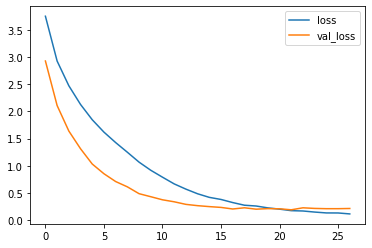

In [36]:
plt.plot(history_df.loc[ : , 'loss'], label = 'loss')
plt.plot(history_df.loc[ : , 'val_loss'], label = 'val_loss')
plt.legend()

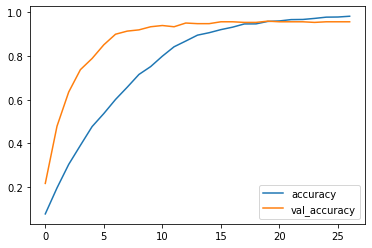

In [37]:
plt.plot(history_df.loc[ : , 'accuracy'], label = 'accuracy')
plt.plot(history_df.loc[ : , 'val_accuracy'], label = 'val_accuracy')
plt.legend()

In [38]:
test_path = '../input/fruit-and-vegetable-image-recognition/test'

test_dataset = image_dataset_from_directory(test_path,
                                            batch_size = 16,
                                            seed = 2059,
                                            label_mode = 'int',
                                            image_size = (224, 224))

Found 359 files belonging to 36 classes.


In [39]:
score = model.evaluate(test_dataset)
score

2022-12-17 14:55:55.852777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/23 [=====>........................] - ETA: 5s - loss: 0.1519 - accuracy: 0.9750

2022-12-17 14:55:59.289490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/23 [==============================] - 8s 272ms/step - loss: 0.1832 - accuracy: 0.9582


[0.18321865797042847, 0.9582172632217407]